In [1]:
import numpy as np
import pandas as pd
import pandas.io.sql as sqlio
import psycopg2 as ps

In [4]:
pip install sqlalchemy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
conn = ps.connect(dbname="bitirme_projesi",
                  user="postgres",
                  password="admin123",
                  port = "5432")

# KATEGORİ BAZINDA SATIŞLARIN ANALİZİ

In [14]:
order_details_query = """
SELECT product_id, "uantity
FROM "order_details"
"""

In [15]:
products_query = """
SELECT product_id, category_id
FROM products
"""
products_df = pd.read_sql_query(products_query, conn)

C:\Users\asus\AppData\Local\Temp\ipykernel_25784\4292599438.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  products_df = pd.read_sql_query(products_query, conn)


In [16]:
categories_query = """
SELECT category_id, category_name
FROM categories
"""
categories_df = pd.read_sql_query(categories_query, conn)

C:\Users\asus\AppData\Local\Temp\ipykernel_25784\496244121.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  categories_df = pd.read_sql_query(categories_query, conn)


In [17]:
merged_df = order_details_df.merge(products_df, on='product_id')
merged_df = merged_df.merge(categories_df, on='category_id')
category_sales = merged_df.groupby('category_name').sum()['quantity'].reset_index()
category_sales = category_sales.sort_values(by='quantity', ascending=False)
print(category_sales)

    category_name  quantity
0       Beverages      9532
3  Dairy Products      9149
2     Confections      7906
7         Seafood      7681
1      Condiments      5298
4  Grains/Cereals      4562
5    Meat/Poultry      4199
6         Produce      2990


In [18]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

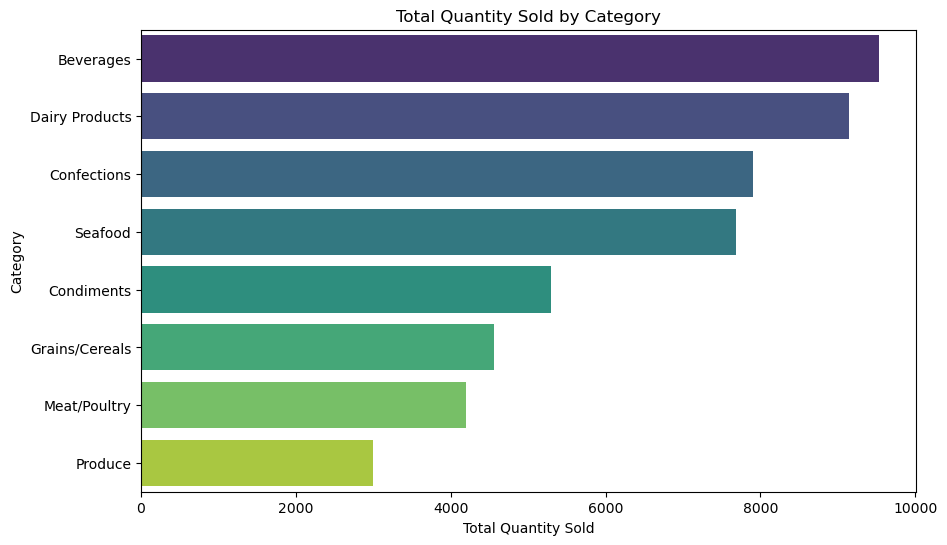

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x='quantity', y='category_name', data=category_sales, palette='viridis')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Category')
plt.title('Total Quantity Sold by Category')
plt.show()

# ÇALIŞAN PERFORMANS ANALİZİ

In [87]:
query = """
SELECT e."employee_id", e."first_name",
       SUM(od."unit_price" * od."quantity") AS "TotalSales",
       AVG(od."unit_price" * od."quantity") AS "AvgOrderValue"
FROM "orders" o
JOIN "employees" e ON o."employee_id" = e."employee_id"
JOIN "order_details" od ON o."order_id" = od."order_id"
GROUP BY e."employee_id", e."first_name"
ORDER BY "TotalSales" DESC;
"""

In [88]:
df = pd.read_sql_query(query, conn)

C:\Users\asus\AppData\Local\Temp\ipykernel_25784\1553155693.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [89]:
print(df)

   employee_id first_name     TotalSales  AvgOrderValue
0            4   Margaret  250187.450253     595.684405
1            3      Janet  213051.299480     663.711213
2            1      Nancy  202143.710309     585.923798
3            2     Andrew  177749.260477     737.548799
4            7     Robert  141295.990103     802.818126
5            8      Laura  133301.030066     512.696269
6            9       Anne   82963.999818     775.364484
7            6    Michael   78198.099934     465.464881
8            5     Steven   75567.750003     645.878205


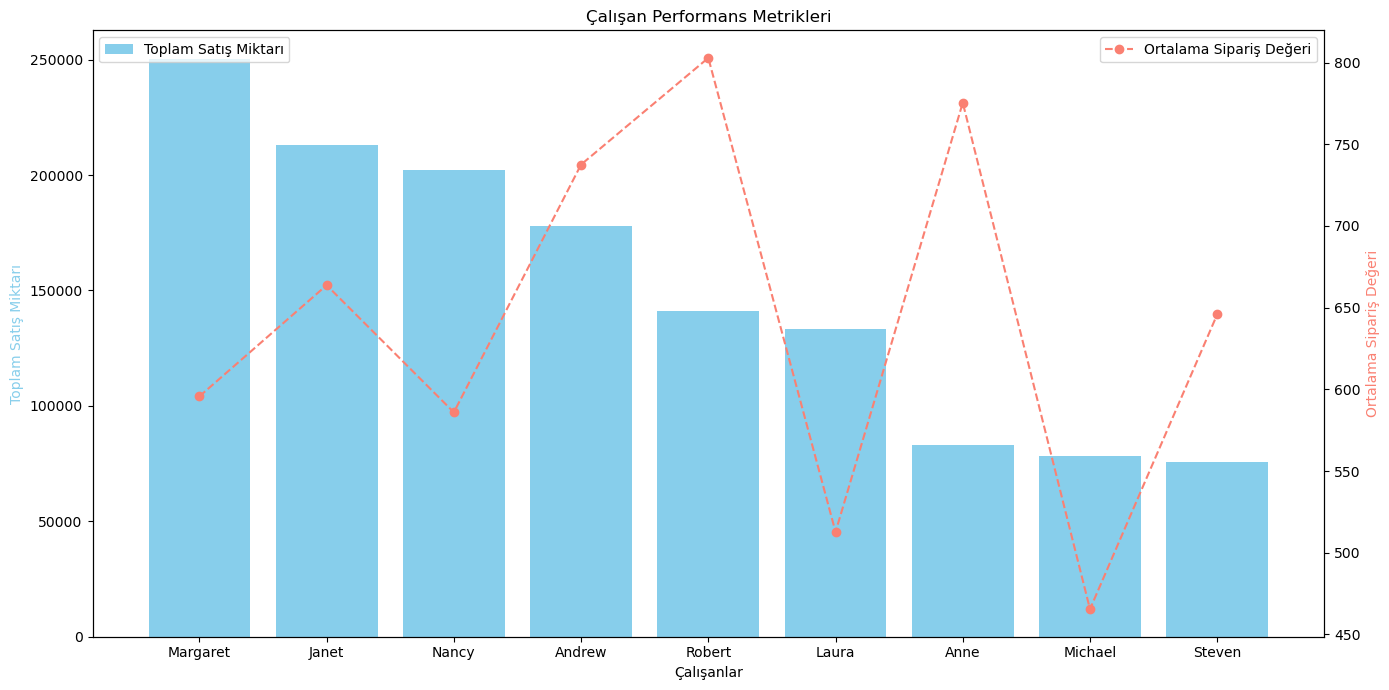

In [90]:
plt.figure(figsize=(14, 7))
ax1 = plt.gca()
ax1.bar(df['first_name'], df['TotalSales'], color='skyblue', label='Toplam Satış Miktarı')
ax2 = ax1.twinx()
ax2.plot(df['first_name'], df['AvgOrderValue'], color='salmon', marker='o', linestyle='--', label='Ortalama Sipariş Değeri')
ax1.set_xlabel('Çalışanlar')
ax1.set_ylabel('Toplam Satış Miktarı', color='skyblue')
ax2.set_ylabel('Ortalama Sipariş Değeri', color='salmon')
plt.xticks(rotation=45, ha='right')
plt.title('Çalışan Performans Metrikleri')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()